**1.3.2. [Numerical operations on arrays](http://scipy-lectures.org/intro/numpy/operations.html)**

本节内容：
- 元素操作（Elementwise operations）
- 基本缩减（Basic reductions）
- 广播（Broadcasting）
- 数组形状操作（Array shape manipulation）
- 数据排序（Sorting data）
- 总结（Summary）

# 1.3.2.1 元素操作

**基本操作**


In [4]:
import numpy as np
a = np.array([1, 2, 3, 4])
a + 1

array([2, 3, 4, 5])

In [5]:
2 ** a

array([ 2,  4,  8, 16])

In [9]:
b = np.ones(4) + 1
b

array([2., 2., 2., 2.])

In [10]:
a - b

array([-1.,  0.,  1.,  2.])

In [11]:
a * b

array([2., 4., 6., 8.])

In [12]:
j = np.arange(5)
j

array([0, 1, 2, 3, 4])

In [13]:
2 ** (j + 1) - j

array([ 2,  3,  6, 13, 28])

In [14]:
a = np.arange(10000)
%timeit a + 1

6.13 µs ± 497 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
l = range(10000)
%timeit [i + 1 for i in l]

660 µs ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [17]:
c = np.ones((3, 3))
c

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [18]:
c.dot(c)

array([[3., 3., 3.],
       [3., 3., 3.],
       [3., 3., 3.]])

**其他操作**

In [19]:
# 比较
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
a == b

array([False,  True, False,  True])

In [22]:
a > b

array([False, False,  True, False])

In [23]:
# 数组比较
a = np.array([1, 2, 3, 4])
b = np.array([4, 2, 2, 4])
c = np.array([1, 2, 3, 4])

np.array_equal(a, b)

False

In [24]:
np.array_equal(a, c)

True

In [25]:
# 逻辑操作
a = np.array([1, 1, 0, 0])
b = np.array([1, 0, 1, 0])

np.logical_or(a, b)

array([ True,  True,  True, False])

In [26]:
np.logical_and(a, b)

array([ True, False, False, False])

In [28]:
# 超越函数 Transcendental functions
a = np.arange(5)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [31]:
np.log(a)

/home/qinjh/workspace/python/DataAnalysisWithPython/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


array([      -inf, 0.        , 0.69314718, 1.09861229, 1.38629436])

In [32]:
np.exp(a)

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [33]:
# Shape mismatches
a = np.arange(4)
a + np.array([1, 2])

ValueError: operands could not be broadcast together with shapes (4,) (2,) 

上面发生错误了，该操作不能散播这类形状

In [51]:
# Transposition
a = np.triu(np.ones((3, 3)), 1)
a

array([[0., 1., 1.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [44]:
help(np.triu)

Help on function triu in module numpy:

triu(m, k=0)
    Upper triangle of an array.
    
    Return a copy of a matrix with the elements below the `k`-th diagonal
    zeroed.
    
    Please refer to the documentation for `tril` for further details.
    
    See Also
    --------
    tril : lower triangle of an array
    
    Examples
    --------
    >>> np.triu([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1)
    array([[ 1,  2,  3],
           [ 4,  5,  6],
           [ 0,  8,  9],
           [ 0,  0, 12]])



# 1.3.2.2. Basic reductions

<div align="center">
    <img src = "http://scipy-lectures.org/_images/reductions.png">
</div>

**Computing sums**

In [53]:
x  = np.array([1,2,3,4])  
np.sum(x)

10

In [54]:
x.sum()

10

In [56]:
x = np.array([[1,1],[2,2]])
x

array([[1, 1],
       [2, 2]])

In [57]:
x.sum()

6

In [58]:
x.sum(axis=0)

array([3, 3])

In [59]:
x.sum(axis=1)

array([2, 4])

In [63]:
x[:,0].sum(), x[:,1].sum()

(3, 3)

In [65]:
x[0,:].sum(), x[1,:].sum()

(2, 4)

In [72]:
x = np.random.rand(2,2,2)
x

array([[[0.78723098, 0.7167613 ],
        [0.31405689, 0.89713036]],

       [[0.68280236, 0.66371908],
        [0.78221246, 0.87264093]]])

In [78]:
x.sum(axis=2)[0,1]

1.2111872503229275

In [79]:
x[0,1,:].sum()

1.2111872503229275

**Other reductions**

In [81]:
# Extrema

x = np.array([1,3,2])
x.min()

1

In [82]:
x.max()

3

In [83]:
x.argmin()

0

In [84]:
x.argmax()

1

In [87]:
np.all([True, True, False])

False

In [88]:
np.any([True, True, False])

True

In [89]:
a = np.zeros((100, 100))
a

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
np.any( a !=0)

False

In [91]:
np.all(a ==a)

True

In [92]:
a = np.array([1, 2, 3, 2])
b = np.array([2, 2, 3, 2])
c = np.array([6, 4, 4, 5])

a <= b

array([ True,  True,  True,  True])

In [93]:
b <= c

array([ True,  True,  True,  True])

In [95]:
((a<=b) & (b<=c)).all()

True

In [97]:
x = np.array([1, 2, 3, 1])
y = np.array([[1, 2, 3], [5, 6, 1]])
x.mean()


1.75

In [98]:
np.median(x)

1.5

In [102]:
np.median(y, axis=-1) # last axis


array([2., 5.])

In [103]:
x.std()          # full population standard dev.

0.82915619758885

**Worked Example: data statistics**

数据样本（code/populations.txt）描述了野兔的数量和猞猁(胡萝卜)在加拿大北部的20年：

In [110]:
!cat code/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


首先，加载数据到 Numpy 数组：

In [111]:
data = np.loadtxt('code/populations.txt')
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

In [113]:
year, hares, lynxes, carrots = data.T  # trick: columns to variables

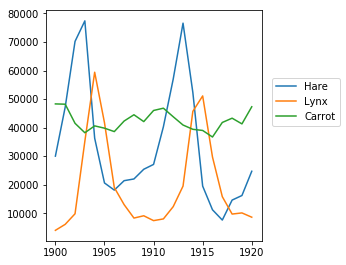

In [134]:
from matplotlib import pyplot as plt

plt.axes([0.2, 0.1, 0.5, 0.8])
plt.plot(year, hares, year, lynxes, year, carrots)
plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 
plt.show()

In [148]:
# 这期间的平均人口：
populations = data[:,1:]
populations

array([[30000.,  4000., 48300.],
       [47200.,  6100., 48200.],
       [70200.,  9800., 41500.],
       [77400., 35200., 38200.],
       [36300., 59400., 40600.],
       [20600., 41700., 39800.],
       [18100., 19000., 38600.],
       [21400., 13000., 42300.],
       [22000.,  8300., 44500.],
       [25400.,  9100., 42100.],
       [27100.,  7400., 46000.],
       [40300.,  8000., 46800.],
       [57000., 12300., 43800.],
       [76600., 19500., 40900.],
       [52300., 45700., 39400.],
       [19500., 51100., 39000.],
       [11200., 29700., 36700.],
       [ 7600., 15800., 41800.],
       [14600.,  9700., 43300.],
       [16200., 10100., 41300.],
       [24700.,  8600., 47300.]])

In [149]:
# 标准差（standard deviations:）
populations.std(axis=0)

array([20897.90645809, 16254.59153691,  3322.50622558])

In [151]:
# 每年数量最多的物种索引
np.argmax(populations, axis=1)

array([2, 2, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2])

**Worked Example: diffusion using a random walk algorithm （使用随机漫步算法扩散）**

<div align="center">
    <img src="http://scipy-lectures.org/_images/random_walk.png">
</div>    

我们先考虑一维随机漫步的过程：每次漫步向左或者向右有相同的概率。

我们感兴趣的是从原始的随机漫步向左或者向右扩散之后找出典型距离。我们模拟多种“漫步”来找出规律，使用数组计算技巧：创建二维数组，每个漫步都有方向、和时间。

<div align="center">
    <img src="http://scipy-lectures.org/_images/random_walk_schema.png">
</div>    



In [161]:
n_stories = 1000 # number of walkers
t_max = 200      # time during which we follow the walker
t = np.arange(t_max)

steps = 2 * np.random.randint(0, 1 + 1, (n_stories, t_max)) - 1 # +1 because the high value is exclusive
steps

array([[-1, -1,  1, ...,  1,  1,  1],
       [ 1, -1, -1, ..., -1,  1,  1],
       [-1, -1, -1, ...,  1,  1,  1],
       ...,
       [-1, -1, -1, ...,  1,  1, -1],
       [ 1, -1,  1, ...,  1, -1,  1],
       [ 1, -1, -1, ...,  1, -1,  1]])

In [164]:
np.unique(steps) # Verification: all steps are 1 or -1

positions = np.cumsum(steps, axis=1) # axis = 1: dimension of time
sq_distance = positions**2
sq_distance

array([[  1,   4,   1, ...,  16,  25,  36],
       [  1,   0,   1, ...,  36,  49,  64],
       [  1,   4,   9, ...,   4,   9,  16],
       ...,
       [  1,   4,   9, ..., 256, 225, 256],
       [  1,   0,   1, ..., 324, 361, 324],
       [  1,   0,   1, ...,   0,   1,   0]])

In [165]:
mean_sq_distance = np.mean(sq_distance, axis=0)
mean_sq_distance

array([  1.   ,   2.12 ,   2.92 ,   3.836,   4.76 ,   5.82 ,   6.568,
         7.62 ,   8.392,   9.336,  10.016,  11.008,  11.968,  13.332,
        14.312,  15.288,  16.784,  17.752,  18.488,  19.528,  20.856,
        22.024,  22.672,  23.552,  24.424,  25.056,  26.408,  27.06 ,
        28.552,  29.548,  31.416,  32.404,  33.016,  34.292,  35.48 ,
        36.672,  37.6  ,  38.92 ,  39.928,  40.312,  41.336,  42.996,
        42.912,  44.108,  45.616,  46.24 ,  46.848,  48.012,  49.968,
        50.888,  52.096,  52.58 ,  53.912,  55.252,  55.752,  57.048,
        58.352,  58.524,  59.344,  59.94 ,  60.688,  61.344,  62.488,
        63.124,  63.368,  63.348,  63.16 ,  64.384,  65.552,  65.32 ,
        66.432,  67.38 ,  68.728,  70.416,  71.152,  71.976,  72.736,
        72.856,  74.616,  76.452,  77.496,  78.132,  79.392,  79.772,
        80.44 ,  80.768,  81.976,  83.66 ,  84.52 ,  85.244,  86.688,
        87.788,  88.472,  89.104,  90.592,  91.76 ,  94.08 ,  95.004,
        96.224,  97.

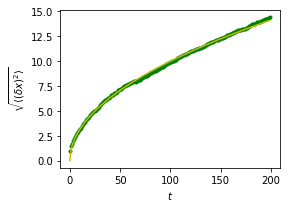

In [166]:
plt.figure(figsize=(4, 3)) 
plt.plot(t, np.sqrt(mean_sq_distance), 'g.', t, np.sqrt(t), 'y-') 
plt.xlabel(r"$t$") 
plt.ylabel(r"$\sqrt{\langle (\delta x)^2 \rangle}$") 
plt.tight_layout() # provide sufficient space for labels

我们发现一个著名物理学结果:均方根距离随着时间的平方根!

# 1.3.2.3. Broadcasting
- Basic operations on numpy arrays (addition, etc.) are elementwise
- This works on arrays of the same size.

Nevertheless, It’s also possible to do operations on arrays of different sizes if NumPy can transform these arrays so that they all have the same size: this conversion is called broadcasting. 

The image below gives an example of broadcasting:

<div align="center">
    <img src="http://scipy-lectures.org/_images/numpy_broadcasting.png">
</div>    

In [176]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T
a

array([[ 0,  0,  0],
       [10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [181]:
b = np.array([0, 1, 2])
b

array([0, 1, 2])

In [182]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

In [183]:
# We have already used broadcasting without knowing it!:
a = np.ones((4, 5))
a[0] = 2  # we assign an array of dimension 0 to an array of dimension 1
a

array([[2., 2., 2., 2., 2.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [194]:
# A useful trick:
a = np.arange(0, 40, 10) 
a

array([ 0, 10, 20, 30])

In [195]:
a.shape

(4,)

In [196]:
a = a[:, np.newaxis]  # adds a new axis -> 2D array
a

array([[ 0],
       [10],
       [20],
       [30]])

In [199]:
a.shape

(4, 1)

In [200]:
a + b

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

Boradcasting 看起来很魔幻，但是用它来解决问题是十分自然的，对于输出数据是比输入维度更多的数组来说。

**Worked Example: Broadcasting**

Let’s construct an array of distances (in miles) between cities of Route 66: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff and Los Angeles.

In [201]:
mileposts = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
mileposts

array([   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448])

In [202]:
mileposts[:, np.newaxis]

array([[   0],
       [ 198],
       [ 303],
       [ 736],
       [ 871],
       [1175],
       [1475],
       [1544],
       [1913],
       [2448]])

In [203]:
distance_array = np.abs(mileposts - mileposts[:, np.newaxis])
distance_array

array([[   0,  198,  303,  736,  871, 1175, 1475, 1544, 1913, 2448],
       [ 198,    0,  105,  538,  673,  977, 1277, 1346, 1715, 2250],
       [ 303,  105,    0,  433,  568,  872, 1172, 1241, 1610, 2145],
       [ 736,  538,  433,    0,  135,  439,  739,  808, 1177, 1712],
       [ 871,  673,  568,  135,    0,  304,  604,  673, 1042, 1577],
       [1175,  977,  872,  439,  304,    0,  300,  369,  738, 1273],
       [1475, 1277, 1172,  739,  604,  300,    0,   69,  438,  973],
       [1544, 1346, 1241,  808,  673,  369,   69,    0,  369,  904],
       [1913, 1715, 1610, 1177, 1042,  738,  438,  369,    0,  535],
       [2448, 2250, 2145, 1712, 1577, 1273,  973,  904,  535,    0]])


<div align="center">
    <img src="http://scipy-lectures.org/_images/route66.png">
</div>    

A lot of grid-based or network-based problems can also use broadcasting. For instance, if we want to compute the distance from the origin of points on a 10x10 grid, we can do

In [204]:
x, y = np.arange(5), np.arange(5)[:, np.newaxis]
x

array([0, 1, 2, 3, 4])

In [205]:
y

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [208]:
x**2 + y**2

array([[ 0,  1,  4,  9, 16],
       [ 1,  2,  5, 10, 17],
       [ 4,  5,  8, 13, 20],
       [ 9, 10, 13, 18, 25],
       [16, 17, 20, 25, 32]])

In [209]:
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

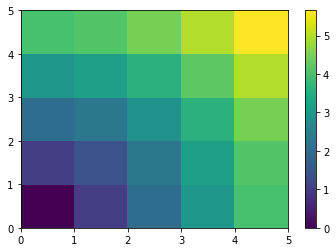

In [211]:
plt.pcolor(distance)    
plt.colorbar()    
plt.show()

> **Remark** : the numpy.ogrid() function allows to directly create vectors x and y of the previous example, with two “significant dimensions”:

In [5]:
import numpy as np

x, y = np.ogrid[0:5, 0:5]
x, y

(array([[0],
        [1],
        [2],
        [3],
        [4]]), array([[0, 1, 2, 3, 4]]))

In [6]:
x.shape, y.shape

((5, 1), (1, 5))

In [8]:
distance = np.sqrt(x ** 2 + y ** 2)
distance

array([[0.        , 1.        , 2.        , 3.        , 4.        ],
       [1.        , 1.41421356, 2.23606798, 3.16227766, 4.12310563],
       [2.        , 2.23606798, 2.82842712, 3.60555128, 4.47213595],
       [3.        , 3.16227766, 3.60555128, 4.24264069, 5.        ],
       [4.        , 4.12310563, 4.47213595, 5.        , 5.65685425]])

So, np.ogrid is very useful as soon as we have to handle computations on a grid. On the other hand, np.mgrid directly provides matrices full of indices for cases where we can’t (or don’t want to) benefit from broadcasting:

In [18]:
x , y = np.mgrid[0: 4, 0: 4]

In [19]:
x

array([[0, 0, 0, 0],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [3, 3, 3, 3]])

In [20]:
y

array([[0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3],
       [0, 1, 2, 3]])

> **See also** [Broadcasting](http://scipy-lectures.org/advanced/advanced_numpy/index.html#broadcasting-advanced): discussion of broadcasting in the [Advanced NumPy](http://scipy-lectures.org/advanced/advanced_numpy/index.html#advanced-numpy) chapter.

# 1.3.2.4. Array shape manipulation

**Flattening**


In [21]:
a = np.array([[1, 2, 3], [4, 5, 6]])
a.ravel()

array([1, 2, 3, 4, 5, 6])

In [24]:
a.T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [25]:
a.T.ravel()

array([1, 4, 2, 5, 3, 6])

**Reshaping**

In [26]:
a.shape

(2, 3)

In [28]:
b = a.ravel()
b

array([1, 2, 3, 4, 5, 6])

In [30]:
b = b.reshape((2, 3))
b

array([[1, 2, 3],
       [4, 5, 6]])

In [31]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [32]:
a.reshape((2, -1))    # unspecified (-1) value is inferred

array([[1, 2, 3],
       [4, 5, 6]])

In [33]:
b[0, 0] = 39
a

array([[39,  2,  3],
       [ 4,  5,  6]])

In [35]:
a = np.zeros((3, 2))
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [40]:
b = a.T.reshape( 3 * 2)
b

array([0., 0., 0., 0., 0., 0.])

In [41]:
b[0] = 9
b

array([9., 0., 0., 0., 0., 0.])

In [42]:
a

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

**Adding a dimension**

In [43]:
z = np.array([1, 2, 3])
z

array([1, 2, 3])

In [44]:
z[:,np.newaxis]

array([[1],
       [2],
       [3]])

In [51]:
z[np.newaxis,:]

array([[1, 2, 3]])

**Dimension shuffling**

In [55]:
a = np.arange(4*3*2).reshape(4, 3, 2)
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [56]:
a.shape

(4, 3, 2)

In [58]:
a[0, 2, 1]

5

In [60]:
b = a.transpose(1, 2, 0)
b

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19]],

       [[ 2,  8, 14, 20],
        [ 3,  9, 15, 21]],

       [[ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [61]:
b.shape

(3, 2, 4)

In [64]:
b[2, 1, 0] = -1
a[0, 2, 1]

-1

In [63]:
a[0, 2, 1]

-1

**Resizing**

In [66]:
a = np.arange(4)
a.resize((8,))
a

array([0, 1, 2, 3, 0, 0, 0, 0])

# 1.3.2.5. Sorting data

In [68]:
a = np.array([[4, 3, 5], [1, 2, 1]])
b = np.sort(a, axis=1)
b

array([[3, 4, 5],
       [1, 1, 2]])

In [69]:
a.sort(axis=1)
a

array([[3, 4, 5],
       [1, 1, 2]])

In [70]:
# Sorting with fancy indexing:


a = np.array([4, 3, 1, 2])
j = np.argsort(a)
j

array([2, 3, 1, 0])

In [71]:
# Finding minima and maxima:

a = np.array([4, 3, 1, 2])
j_max = np.argmax(a)
j_min = np.argmin(a)
j_max, j_min

(0, 2)

# 1.3.2.6. Summary

**What do you need to know to get started?**

- Know how to create arrays : `array`, `arange`, `ones`, `zeros`.

- Know the shape of the array with `array.shape`, then use slicing to obtain different views of the array: `array[::2]`, etc. Adjust the shape of the array using `reshape` or flatten it with `ravel`.

- Obtain a subset of the elements of an array and/or modify their values with masks

- Know miscellaneous operations on arrays, such as finding the mean or max (`array.max()`, `array.mean()`). No need to retain everything, but have the reflex to search in the documentation (online docs, `help()`, `lookfor()`)!!

- For advanced use: master the indexing with arrays of integers, as well as broadcasting. Know more NumPy functions to handle various array operations.

